In [26]:
import pandas as pd
data_types = {'value': float}
bitcoin_raw_df = pd.read_csv('bitstampUSD.csv', dtype=data_types)



#Checking the file.
bitcoin_raw_df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [27]:
#View of the Columns
bitcoin_raw_df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [28]:
#We are sellecting the columns we need for the project

selected_columns = [
    'Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)'
]

In [30]:
#Get a copy of the file so we dont alter the original file 

bitcoin_df = bitcoin_raw_df[selected_columns].copy()




In [36]:
#General Statistics for our dataset.


# Format to 2 decimal places as the values are in scientific notation
pd.options.display.float_format = '{:.2f}'.format  

bitcoin_df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC)
count,4857377.00,3613769.00,3613769.00,3613769.00,3613769.00,3613769.00
mean,1471300766.50,6009.02,6013.36,6004.49,6009.01,9.32
std,84280194.38,8996.25,9003.52,8988.78,8996.36,30.55
min,1325317920.00,3.80,3.80,1.50,1.50,0.00
25%,1398178560.00,443.86,444.00,443.52,443.86,0.41
50%,1471427520.00,3596.97,3598.19,3595.62,3597.00,1.98
75%,1544288160.00,8627.27,8632.98,8621.09,8627.16,7.28
max,1617148800.00,61763.56,61781.83,61673.55,61781.80,5853.85


In [43]:
#converted the timestamps from numbers into dates with specified times.

bitcoin_df['Timestamp'] = pd.to_datetime(bitcoin_df['Timestamp'], unit='s')
bitcoin_df

,Timestamp,Open,High,Low,Close,Volume_(BTC)
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.46
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.38
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.29
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.71
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.72


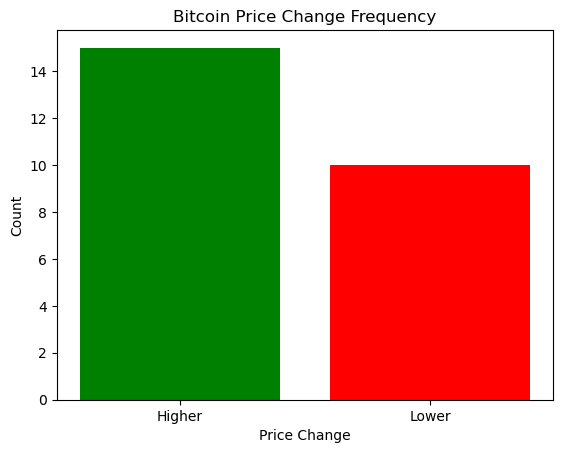

<Figure size 640x480 with 0 Axes>

In [83]:
import matplotlib.pyplot as plt

#Create Function to Calculate how many days bitcoin closed higher or lower.

def count_price_changes(bitcoin_df):
    bitcoin_df['price_change'] = bitcoin_df['Close'] - bitcoin_df['Open']
    bitcoin_df['higher'] = bitcoin_df['price_change'] > 0
    bitcoin_df['lower'] = bitcoin_df['price_change'] < 0
    
    num_higher = bitcoin_df['higher'].sum()
    num_lower = bitcoin_df['lower'].sum()
    
    return num_higher, num_lower

# Bar Chart to visualise the data.
num_higher = 15
num_lower = 10

categories = ['Higher', 'Lower']
counts = [num_higher, num_lower]

plt.bar(categories, counts, color=['green', 'red'])
plt.xlabel('Price Change')
plt.ylabel('Count')
plt.title('Bitcoin Price Change Frequency')
plt.show()
plt.savefig('returns.png')

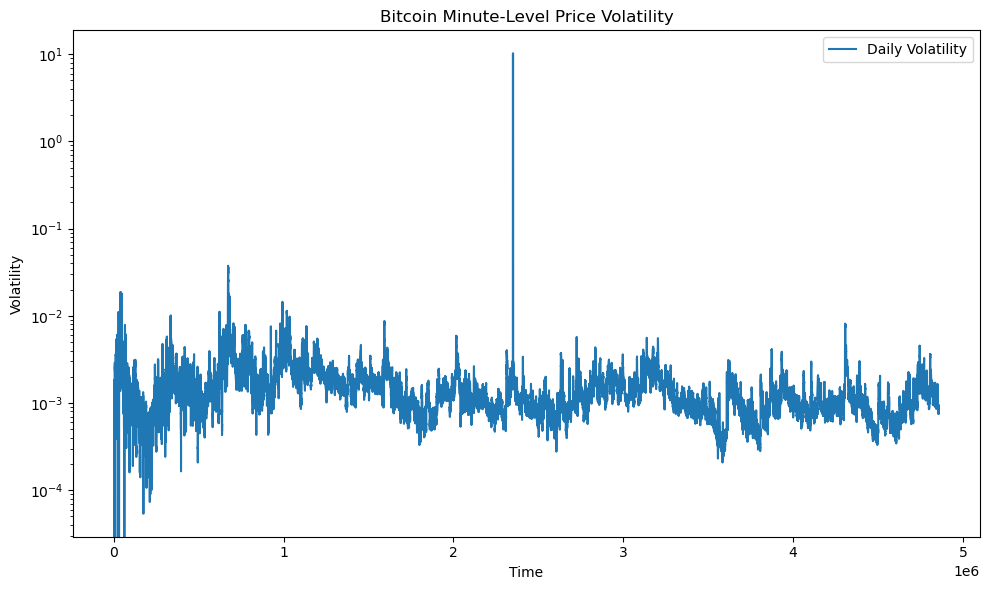

<Figure size 640x480 with 0 Axes>

In [82]:
# Calculate minute-level returns
bitcoin_df['returns'] = bitcoin_df['Close'].pct_change()

#Since the data is in minutes to calculate the rolling volatility of bitcoin 
#We need to increase the window size to 1440 which is the amount of minutes in a day
window_size = 1440
bitcoin_df['volatility'] = bitcoin_df['returns'].rolling(window=window_size).std()

# Plotting the volatility with a logarithmic y-axis scale
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_df.index, bitcoin_df['volatility'], label='Daily Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Bitcoin Minute-Level Price Volatility')
plt.yscale('log')  # Set y-axis to logarithmic scale as the values are very small.
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('Volatility.png')

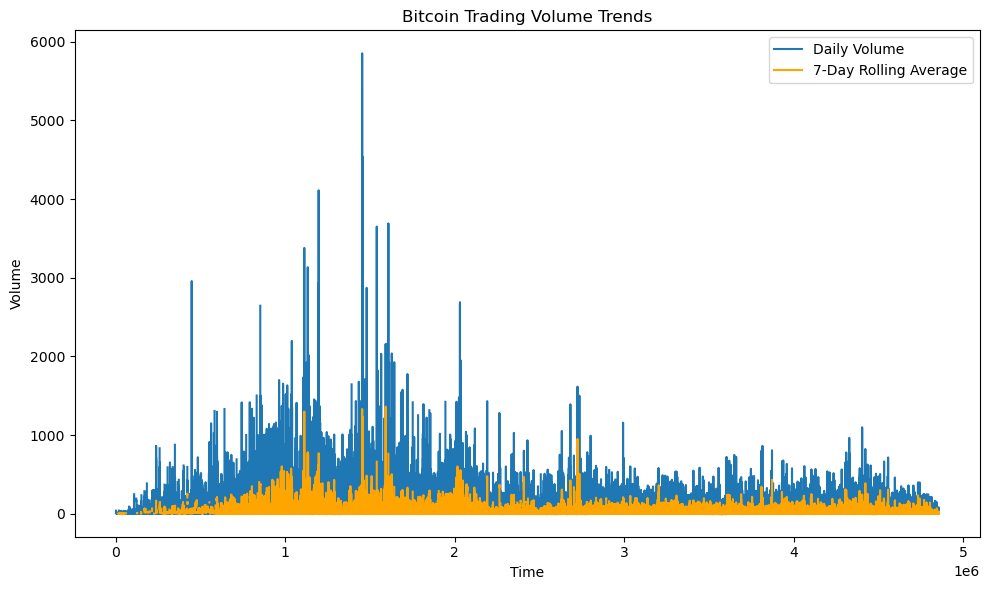

<Figure size 640x480 with 0 Axes>

In [87]:
rolling_average = bitcoin_df['Volume_(BTC)'].rolling(window=7).mean()

# Plotting the trading volume trends
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_df.index, bitcoin_df['Volume_(BTC)'], label='Daily Volume')
plt.plot(rolling_average.index, rolling_average, label='7-Day Rolling Average', color='orange')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Bitcoin Trading Volume Trends')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('Volume_trends.png')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Normalize data
scaler = MinMaxScaler()
bitcoin_df['close_scaled'] = scaler.fit_transform(bitcoin_df[['close']])

# Prepare data for LSTM
sequence_length = 10
X = []
y = []
for i in range(len(bitcoin_df) - sequence_length):
    X.append(bitcoin_df['close_scaled'].values[i:i+sequence_length])
    y.append(bitcoin_df['close_scaled'].values[i+sequence_length])
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Forecast future values
forecast_steps = 30
last_sequence = X[-1]
forecast = []
for _ in range(forecast_steps):
    forecast.append(model.predict(np.array([last_sequence]))[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = forecast[-1]

# Transform forecasted values back to original scale
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot the observed and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_df.index, bitcoin_df['close'], label='Observed')
plt.plot(pd.date_range(start=bitcoin_df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast', color='orange')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Forecasting using LSTM')
plt.legend()
plt.tight_layout()
plt.show()